In [161]:
#Project 1
#Andrew Miller, Valerie Pippenger, Damiso Hutchinson, Caroline Larry, Diana Kennen

In [162]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [163]:
#Save csv file names
file_one = "summer_olympics.csv"
file_two = "gdp.csv"

In [164]:
#Import csv files
olympicsI_df = pd.read_csv(file_one, encoding="ISO-8859-1")
gdp_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [165]:
#View olympics file
olympicsI_df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Athens,2004,Aquatics,Diving,3m springboard,"DESPATIE, Alexandre",Men,CAN,Canada,M,Silver
1,Athens,2004,Aquatics,Diving,3m springboard,"SAUTIN, Dmitry",Men,RUS,Russia,M,Bronze
2,Athens,2004,Aquatics,Diving,3m springboard,"PAKHALINA, Ioulia",Women,RUS,Russia,W,Bronze
3,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"NEWBERY, Robert",Men,AUS,Australia,M,Bronze
4,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"BIMIS, Thomas",Men,GRE,Greece,M,Gold


In [166]:
#Drop NaN
olympicsI_df.dropna()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Athens,2004,Aquatics,Diving,3m springboard,"DESPATIE, Alexandre",Men,CAN,Canada,M,Silver
1,Athens,2004,Aquatics,Diving,3m springboard,"SAUTIN, Dmitry",Men,RUS,Russia,M,Bronze
2,Athens,2004,Aquatics,Diving,3m springboard,"PAKHALINA, Ioulia",Women,RUS,Russia,W,Bronze
3,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"NEWBERY, Robert",Men,AUS,Australia,M,Bronze
4,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"BIMIS, Thomas",Men,GRE,Greece,M,Gold
...,...,...,...,...,...,...,...,...,...,...,...
15311,Sydney,2000,Wrestling,Wrestling Gre-R,69 - 76kg,"LINDLAND, Matt James",Men,USA,United States,M,Silver
15312,Sydney,2000,Wrestling,Wrestling Gre-R,97 - 130kg,"KARELIN, Aleksandr",Men,RUS,Russia,M,Silver
15313,Sydney,2000,Wrestling,Wrestling Gre-R,76 - 85kg,"YERLIKAYA, Hamza",Men,TUR,Turkey,M,Gold
15314,Sydney,2000,Wrestling,Wrestling Gre-R,54 - 58kg,"KIM, In-Sub",Men,KOR,"Korea, South",M,Silver


In [167]:
#Checking for file types and number of data points
olympicsI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [168]:
#Setting year to be a string
olympicsI_df = olympicsI_df.fillna(0)
olympicsI_df["Year"] = olympicsI_df["Year"].astype(int)
olympicsI_df["Year"] = olympicsI_df["Year"].astype(str)

In [169]:
#Viewing gdp df
gdp_df.head()

,Entity,Code,Year,GDP (constant 2010 US$)
0,Afghanistan,AFG,2002,8.013233e+09
1,Afghanistan,AFG,2003,8.689884e+09
2,Afghanistan,AFG,2004,8.781610e+09
3,Afghanistan,AFG,2005,9.762979e+09
4,Afghanistan,AFG,2006,1.030523e+10


In [170]:
#Fix South Korea
olympicsI_df["Country"].replace({"Korea, South": "South Korea", "Korea, North": "North Korea"}, inplace = True)

In [171]:
#Concatenating the country and year for the purpose of merging the two files
olympicsI_df["combo"] = olympicsI_df["Country"] + olympicsI_df["Year"]
olympicsI_df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,combo
0,Athens,2004,Aquatics,Diving,3m springboard,"DESPATIE, Alexandre",Men,CAN,Canada,M,Silver,Canada2004
1,Athens,2004,Aquatics,Diving,3m springboard,"SAUTIN, Dmitry",Men,RUS,Russia,M,Bronze,Russia2004
2,Athens,2004,Aquatics,Diving,3m springboard,"PAKHALINA, Ioulia",Women,RUS,Russia,W,Bronze,Russia2004
3,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"NEWBERY, Robert",Men,AUS,Australia,M,Bronze,Australia2004
4,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"BIMIS, Thomas",Men,GRE,Greece,M,Gold,Greece2004


In [172]:
#Counting the number if datapoints from each city
olympicsI_df.City.value_counts()

Beijing        2042
Sydney         2015
Athens         1998
Atlanta        1859
Barcelona      1705
Seoul          1546
Los Angeles    1459
Moscow         1387
Montreal       1305
Name: City, dtype: int64

In [173]:
#Creating a function for assigning host countries
def country_getter(city):
    if city == 'Beijing':
        return('China')
    elif city == 'Sydney':
        return('Australia')
    elif city ==  "Athens":
        return("Greece")
    elif city == "Atlanta":
        return("United States")
    elif city == "Barcelona":
        return("Spain")
    elif city == "Montreal":
        return("Canada")
    elif city == "Seoul":
        return("South Korea")
    elif city == "Los Angeles":
        return("United States")
    elif city == "Moscow":
        return("Russia")
    else:
        return('country not found')

In [174]:
#Applying host country function
olympicsI_df['host country'] = olympicsI_df.City.apply(country_getter)

In [175]:
#Double Checking host country counts
olympicsI_df["host country"].value_counts()

United States    3318
China            2042
Australia        2015
Greece           1998
Spain            1705
South Korea      1546
Russia           1387
Canada           1305
Name: host country, dtype: int64

In [176]:
#Concatenating gdp country and year for merge purposes
gdp_df["combo"] = gdp_df["Entity"] + gdp_df["Year"].map(str)

In [177]:
#Checking for new combo column
gdp_df.head()

,Entity,Code,Year,GDP (constant 2010 US$),combo
0,Afghanistan,AFG,2002,8.013233e+09,Afghanistan2002
1,Afghanistan,AFG,2003,8.689884e+09,Afghanistan2003
2,Afghanistan,AFG,2004,8.781610e+09,Afghanistan2004
3,Afghanistan,AFG,2005,9.762979e+09,Afghanistan2005
4,Afghanistan,AFG,2006,1.030523e+10,Afghanistan2006


In [178]:
korea_list = olympicsI_df[olympicsI_df["Country"]== "South Korea"]
korea_list

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,combo,host country
333,Athens,2004,Archery,Archery,team (FITA Olympic round - 70m),"PARK, Sung-Hyun",Women,KOR,South Korea,W,Gold,South Korea2004,Greece
336,Athens,2004,Archery,Archery,team (FITA Olympic round - 70m),"IM, Dong Hyun",Men,KOR,South Korea,M,Gold,South Korea2004,Greece
337,Athens,2004,Archery,Archery,individual (FITA Olympic round - 70m),"PARK, Sung-Hyun",Women,KOR,South Korea,W,Gold,South Korea2004,Greece
343,Athens,2004,Archery,Archery,team (FITA Olympic round - 70m),"JANG, Yong-Ho",Men,KOR,South Korea,M,Gold,South Korea2004,Greece
346,Athens,2004,Archery,Archery,team (FITA Olympic round - 70m),"PARK, Kyung Mo",Men,KOR,South Korea,M,Gold,South Korea2004,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15111,Sydney,2000,Taekwondo,Taekwondo,49 - 57 kg,"JUNG, Jae-Eun",Women,KOR,South Korea,W,Gold,South Korea2000,Australia
15286,Sydney,2000,Wrestling,Wrestling Free.,69 - 76kg,"MOON, Eui Jae",Men,KOR,South Korea,M,Silver,South Korea2000,Australia
15289,Sydney,2000,Wrestling,Wrestling Free.,58 - 63kg,"JANG, Jae-Sung",Men,KOR,South Korea,M,Bronze,South Korea2000,Australia
15307,Sydney,2000,Wrestling,Wrestling Gre-R,48 - 54kg,"SIM, Kwon-Ho",Men,KOR,South Korea,M,Gold,South Korea2000,Australia


In [179]:
#Merging two dataframes
olympics_df = pd.merge(olympicsI_df, gdp_df, on="combo", how = "left")

In [180]:
olympics_df.drop('Code', inplace=True, axis=1)
olympics_df.drop('Country_Code', inplace=True, axis=1)
olympics_df.drop('Entity', inplace=True, axis=1)
olympics_df.rename(columns = {"Year_y": "GDP Year", "Year_x": "Olympics Year"}, inplace = True)

In [181]:
olympics_df.head()

,City,Olympics Year,Sport,Discipline,Event,Athlete,Gender,Country,Event_gender,Medal,combo,host country,GDP Year,GDP (constant 2010 US$)
0,Athens,2004,Aquatics,Diving,3m springboard,"DESPATIE, Alexandre",Men,Canada,M,Silver,Canada2004,Greece,2004.0,1.480000e+12
1,Athens,2004,Aquatics,Diving,3m springboard,"SAUTIN, Dmitry",Men,Russia,M,Bronze,Russia2004,Greece,2004.0,1.200000e+12
2,Athens,2004,Aquatics,Diving,3m springboard,"PAKHALINA, Ioulia",Women,Russia,W,Bronze,Russia2004,Greece,2004.0,1.200000e+12
3,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"NEWBERY, Robert",Men,Australia,M,Bronze,Australia2004,Greece,2004.0,9.640000e+11
4,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"BIMIS, Thomas",Men,Greece,M,Gold,Greece2004,Greece,2004.0,3.030000e+11


In [182]:
olympics_df.sort_values(by = "Country").head()

,City,Olympics Year,Sport,Discipline,Event,Athlete,Gender,Country,Event_gender,Medal,combo,host country,GDP Year,GDP (constant 2010 US$)
7363,Beijing,2008,Taekwondo,Taekwondo,- 58 kg,"NIKPAI, Rohullah",Men,Afghanistan,M,Bronze,Afghanistan2008,China,2008.0,1.214448e+10
8082,Los Angeles,1984,Boxing,Boxing,75 - 81kg (light-heavyweight),"MOUSSA, Mustapha",Men,Algeria,M,Bronze,Algeria1984,United States,1984.0,8.540465e+10
4475,Barcelona,1992,Boxing,Boxing,54 - 57kg (featherweight),"SOLTANI, Hocine",Men,Algeria,M,Bronze,Algeria1992,Spain,1992.0,9.252182e+10
2371,Atlanta,1996,Athletics,Athletics,1500m,"MORCELI, Nourredine",Men,Algeria,M,Gold,Algeria1996,United States,1996.0,9.699483e+10
13780,Sydney,2000,Athletics,Athletics,1500m,"MERAH-BENIDA, Nouria",Women,Algeria,W,Gold,Algeria2000,Australia,2000.0,1.100000e+11


In [183]:
#Differences in data point count are due to changes in names of countries.
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15315
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     15316 non-null  object 
 1   Olympics Year            15316 non-null  object 
 2   Sport                    15316 non-null  object 
 3   Discipline               15316 non-null  object 
 4   Event                    15316 non-null  object 
 5   Athlete                  15316 non-null  object 
 6   Gender                   15316 non-null  object 
 7   Country                  15316 non-null  object 
 8   Event_gender             15316 non-null  object 
 9   Medal                    15316 non-null  object 
 10  combo                    15316 non-null  object 
 11  host country             15316 non-null  object 
 12  GDP Year                 11909 non-null  float64
 13  GDP (constant 2010 US$)  11909 non-null  float64
dtypes: float64(2), object(

In [184]:
olympics_df.to_csv("olympics.csv", header = True)

In [185]:
#### Randomly select 10 sports

In [213]:
sport = olympics_df["Sport"]
sport.sample(10)

10758       Boxing
8273       Fencing
7310      Softball
13258    Wrestling
11063     Football
6472       Cycling
14880       Rowing
5215        Rowing
14575     Handball
3852     Wrestling
Name: Sport, dtype: object

In [187]:
### Which countries tend to win at what sports?

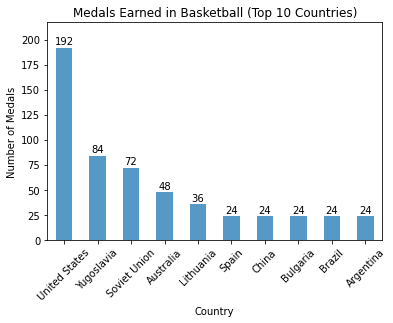

In [188]:
## Top 10 countries in basketball

bball = olympics_df[olympics_df.Sport == "Basketball"].groupby(["Country"]).Medal.size()
top_10_bball = bball.sort_values(ascending = False)[:10]
bball_bar = top_10_bball.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
bball_bar.set_title("Medals Earned in Basketball (Top 10 Countries)")
bball_bar.set_xlabel("Country")
bball_bar.set_ylabel("Number of Medals")

# Formatting the bar chart using a for loop
for b in bball_bar.patches:
     bball_bar.annotate(f'{int(b.get_height())}', 
                        (b.get_x() + b.get_width() / 2.0, 
                         b.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(bball) + 25)

# Showing the bar plot
plt.show()

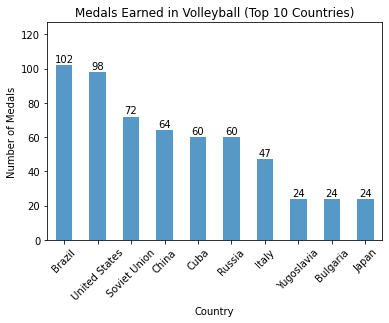

In [189]:
## Top 10 countries in volleyball

vball = olympics_df[olympics_df.Sport == "Volleyball"].groupby(["Country"]).Medal.size()
top_10_vball = vball.sort_values(ascending = False)[:10]
vball_bar = top_10_vball.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
vball_bar.set_title("Medals Earned in Volleyball (Top 10 Countries)")
vball_bar.set_xlabel("Country")
vball_bar.set_ylabel("Number of Medals")

for v in vball_bar.patches:
     vball_bar.annotate(f'{int(v.get_height())}', 
                        (v.get_x() + v.get_width() / 2.0, 
                         v.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(vball) + 25)

# Showing the bar plot
plt.show()

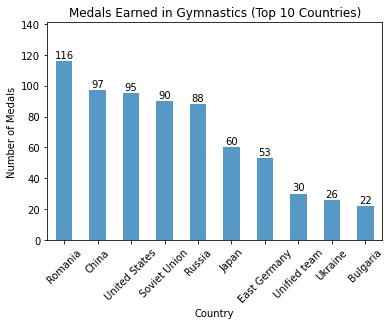

In [190]:
## Top 10 countries in gymnastics

gymnast = olympics_df[olympics_df.Sport == "Gymnastics"].groupby(["Country"]).Medal.size()
top_10_gymnastics = gymnast.sort_values(ascending = False)[:10]
gymnast_bar = top_10_gymnastics.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
gymnast_bar.set_title("Medals Earned in Gymnastics (Top 10 Countries)")
gymnast_bar.set_xlabel("Country")
gymnast_bar.set_ylabel("Number of Medals")

for g in gymnast_bar.patches:
     gymnast_bar.annotate(f'{int(g.get_height())}', 
                        (g.get_x() + g.get_width() / 2.0, 
                         g.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(gymnast) + 25)

# Showing the bar plot
plt.show()

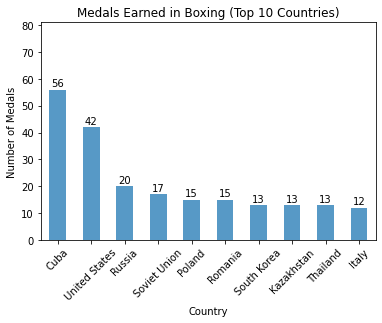

In [191]:
## Top 10 countries in boxing

boxing = olympics_df[olympics_df.Sport == "Boxing"].groupby(["Country"]).Medal.size()
top_10_boxing = boxing.sort_values(ascending = False)[:10]
boxing_bar = top_10_boxing.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
boxing_bar.set_title("Medals Earned in Boxing (Top 10 Countries)")
boxing_bar.set_xlabel("Country")
boxing_bar.set_ylabel("Number of Medals")

for box in boxing_bar.patches:
     boxing_bar.annotate(f'{int(box.get_height())}', 
                        (box.get_x() + box.get_width() / 2.0, 
                         box.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(boxing) + 25)

# Showing the bar plot
plt.show()

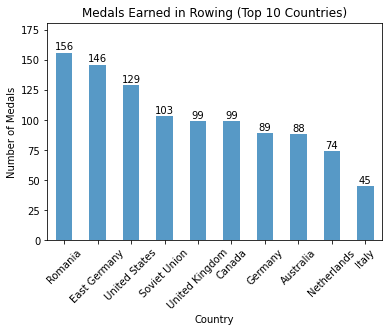

In [192]:
## Top 10 countries in rowing

rowing = olympics_df[olympics_df.Sport == "Rowing"].groupby(["Country"]).Medal.size()
top_10_row = rowing.sort_values(ascending = False)[:10]
row_bar = top_10_row.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
row_bar.set_title("Medals Earned in Rowing (Top 10 Countries)")
row_bar.set_xlabel("Country")
row_bar.set_ylabel("Number of Medals")

for row in row_bar.patches:
     row_bar.annotate(f'{int(row.get_height())}', 
                        (row.get_x() + row.get_width() / 2.0, 
                         row.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(rowing) + 25)

# Showing the bar plot
plt.show()

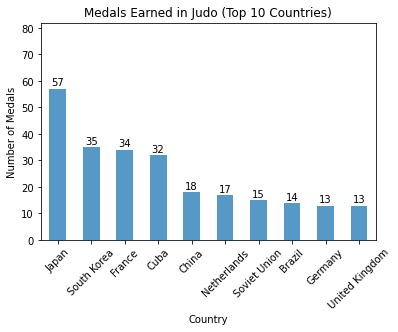

In [206]:
## Top 10 countries in judo

judo = olympics_df[olympics_df.Sport == "Judo"].groupby(["Country"]).Medal.size()
top_10_judo = judo.sort_values(ascending = False)[:10]
judo_bar = top_10_judo.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
judo_bar.set_title("Medals Earned in Judo (Top 10 Countries)")
judo_bar.set_xlabel("Country")
judo_bar.set_ylabel("Number of Medals")

for j in judo_bar.patches:
    judo_bar.annotate(f'{int(j.get_height())}', 
                      (j.get_x() + j.get_width() / 2.0, 
                      j.get_height()),
                      ha = 'center', 
                      va = 'center',
                      xytext = (0, 6),
                      textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(judo) + 25)

# Showing the bar plot
plt.show()

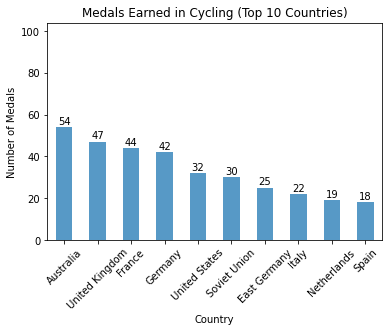

In [214]:
## Top 10 countries in cycling

cycle = olympics_df[olympics_df.Sport == "Cycling"].groupby(["Country"]).Medal.size()
top_10_cycle = cycle.sort_values(ascending = False)[:10]
cycle_bar = top_10_cycle.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
cycle_bar.set_title("Medals Earned in Cycling (Top 10 Countries)")
cycle_bar.set_xlabel("Country")
cycle_bar.set_ylabel("Number of Medals")

for bike in cycle_bar.patches:
     cycle_bar.annotate(f'{int(bike.get_height())}', 
                       (bike.get_x() + bike.get_width() / 2.0, 
                       bike.get_height()),
                       ha = 'center', 
                       va = 'center',
                       xytext = (0, 6),
                       textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(cycle) + 50)

# Showing the bar plot
plt.show()

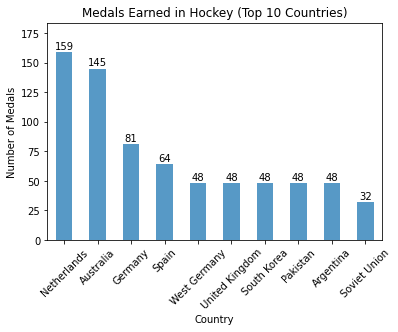

In [215]:
## Top 10 countries in hockey

hockey = olympics_df[olympics_df.Sport == "Hockey"].groupby(["Country"]).Medal.size()
top_10_hockey = hockey.sort_values(ascending = False)[:10]
hockey_bar = top_10_hockey.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
hockey_bar.set_title("Medals Earned in Hockey (Top 10 Countries)")
hockey_bar.set_xlabel("Country")
hockey_bar.set_ylabel("Number of Medals")

# Formatting the bar chart using a for loop
for puck in hockey_bar.patches:
     hockey_bar.annotate(f'{int(puck.get_height())}', 
                         (puck.get_x() + puck.get_width() / 2.0, 
                         puck.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(hockey) + 25)

# Showing the bar plot
plt.show()

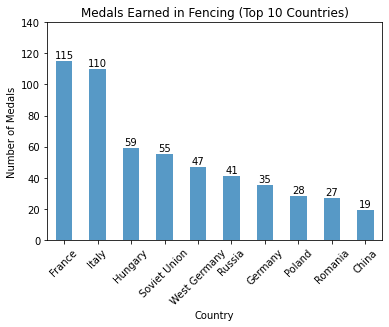

In [210]:
## Top 10 countries in fencing

fencing = olympics_df[olympics_df.Sport == "Fencing"].groupby(["Country"]).Medal.size()
top_10_fence = fencing.sort_values(ascending = False)[:10]
fence_bar = top_10_fence.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
fence_bar.set_title("Medals Earned in Fencing (Top 10 Countries)")
fence_bar.set_xlabel("Country")
fence_bar.set_ylabel("Number of Medals")

# Formatting the bar chart using a for loop
for fence in fence_bar.patches:
     fence_bar.annotate(f'{int(fence.get_height())}', 
                         (fence.get_x() + fence.get_width() / 2.0, 
                         fence.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(fencing) + 25)

# Showing the bar plot
plt.show()

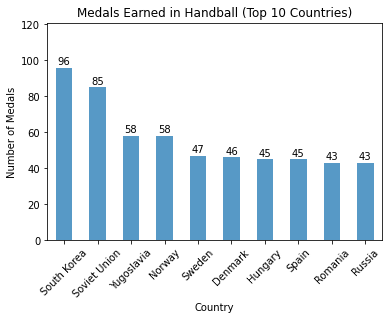

In [216]:
## Top 10 countries in handball

handball = olympics_df[olympics_df.Sport == "Handball"].groupby(["Country"]).Medal.size()
top_10_hand = handball.sort_values(ascending = False)[:10]
hand_bar = top_10_hand.plot.bar(alpha=0.75, width=0.5)

# Generating title and labels for X & Y axis
hand_bar.set_title("Medals Earned in Handball (Top 10 Countries)")
hand_bar.set_xlabel("Country")
hand_bar.set_ylabel("Number of Medals")

# Formatting the bar chart using a for loop
for hand in hand_bar.patches:
     hand_bar.annotate(f'{int(hand.get_height())}', 
                         (hand.get_x() + hand.get_width() / 2.0, 
                         hand.get_height()),
                         ha = 'center', 
                         va = 'center',
                         xytext = (0, 6),
                         textcoords = 'offset points')

# Rotating x-ticks 45 degrees
plt.xticks(rotation=45)

# Setting axis length
plt.ylim(0, max(handball) + 25)

# Showing the bar plot
plt.show()

In [217]:
## Does a country’s GDP change after hosting the Olympics? 